In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# def read_csv(file_name):
#     data = []
#     try:
#         with open(file_name, 'r') as file:
#             reader = csv.reader(file)
#             for row in reader:
#                 # print(row)  # Modify this line to suit your needs (e.g., process or manipulate the data)
#                 data.append(row)
#     except FileNotFoundError:
#         print("File not found.")
#     return data


def read_csv_to_numpy(file_name):
    try:
        data = []
        with open(file_name, 'r') as file:
            reader = csv.reader(file)
            for row in reader:
                data.append([float(elem) for elem in row])
        
        np_array = np.array(data)
        return np_array
    except FileNotFoundError:
        print("File not found.")

# Replace 'your_file.csv' with the path to your CSV file


In [3]:
file_path = '/home/anran.zhang/code/test_robot_models/data/ur10/20.11/erk.csv'
data_erk = read_csv_to_numpy(file_path)
# print(data_erk)

In [4]:
# temp fix, get rid of infeasible data
def check_feasibiltiy(error): 
    for i, elem in enumerate(error):
        if elem < 0:
            error[i] = -elem
        if elem > 1 or elem < -1:
            error[i] = 1.0

In [5]:
err_erk = []
for i in range(0,5):
    err_erk.append([row[2] for row in data_erk if row[0] == i])
err_erk.pop(0)


[]

In [6]:
file_path = '/home/anran.zhang/code/test_robot_models/data/ur10/20.11/irk_GAUSS_LEGENDRE.csv'
data_IRK_leg = read_csv_to_numpy(file_path)
file_path = '/home/anran.zhang/code/test_robot_models/data/ur10/20.11/irk_GAUSS_RADAU_IIA.csv'
data_IRK_rad = read_csv_to_numpy(file_path)
# read irk
err_irk_leg = []
for i in range(0,5):
    err_irk_leg.append([row[2] for row in data_IRK_leg if row[0] == i])
err_irk_leg.pop(0)

err_irk_rad = []
for i in range(0,5):
    err_irk_rad.append([row[2] for row in data_IRK_rad if row[0] == i])
err_irk_rad.pop(0)

[]

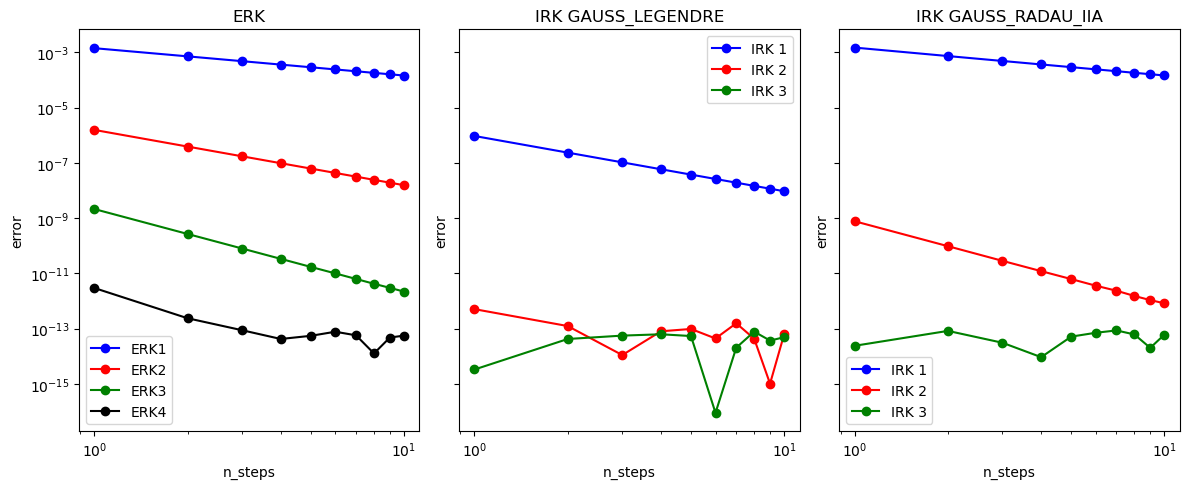

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12, 5))

n_steps =range(1,11)
# Plotting results
ax1.plot(n_steps, err_erk[0], marker='o', linestyle='-', color='blue', label='ERK1')
ax1.plot(n_steps, err_erk[1], marker='o', linestyle='-', color='red', label='ERK2')
ax1.plot(n_steps, err_erk[2], marker='o', linestyle='-', color='green', label='ERK3')
ax1.plot(n_steps, err_erk[3], marker='o', linestyle='-', color='black', label='ERK4')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_title('ERK')
ax1.set_xlabel('n_steps')
ax1.set_ylabel('error')
ax1.legend()

ax2.plot(n_steps, err_irk_leg[0], marker='o', linestyle='-', color='blue', label='IRK 1')
ax2.plot(n_steps, err_irk_leg[1], marker='o', linestyle='-', color='red', label='IRK 2')
ax2.plot(n_steps, err_irk_leg[2], marker='o', linestyle='-', color='green', label='IRK 3')
ax2.set_title('IRK GAUSS_LEGENDRE')
ax2.set_xlabel('n_steps')
ax2.set_ylabel('error')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.legend()

ax3.plot(n_steps, err_irk_rad[0], marker='o', linestyle='-', color='blue', label='IRK 1')
ax3.plot(n_steps, err_irk_rad[1], marker='o', linestyle='-', color='red', label='IRK 2')
ax3.plot(n_steps, err_irk_rad[2], marker='o', linestyle='-', color='green', label='IRK 3')
ax3.set_title('IRK GAUSS_RADAU_IIA')
ax3.set_xlabel('n_steps')
ax3.set_ylabel('error')
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.legend()


plt.tight_layout()
plt.show()